In [1]:
import selenium
import pandas as pd
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium .common.exceptions import StaleElementReferenceException, NoSuchElementException, ElementNotInteractableException
import requests
from selenium.webdriver.common.by import By

In [52]:
#que 1 and 2
def scrape_product_details(product_name, pages_to_scrape=3):
    
    driver = webdriver.Chrome()

    
    driver.get('https://www.amazon.in')

    
    data = {
        'Brand Name': [],
        'Name of the Product': [],
        'Price': [],
        'Return/Exchange': [],
        'Expected Delivery': [],
        'Availability': [],
        'Product URL': []
    }

    try:
        
        search_bar = driver.find_element(By.ID, 'twotabsearchtextbox')
        search_bar.send_keys(product_name)
        search_bar.send_keys(Keys.RETURN)

        time.sleep(2)  

        page_count = 0
        while page_count < pages_to_scrape:
            
            product_containers = driver.find_elements(By.XPATH, "//div[@data-component-type='s-search-result']")

            
            for container in product_containers:
                try:
                    brand_name = container.find_element(By.XPATH, ".//span[@class='a-size-base-plus a-color-base']").text
                except:
                    brand_name = '-'

                try:
                    product_title = container.find_element(By.XPATH, ".//h2/a").get_attribute('textContent')
                except:
                    product_title = '-'

                try:
                    price = container.find_element(By.XPATH, ".//span[@class='a-price']/span[@class='a-offscreen']").text
                except:
                    price = '-'

                try:
                    return_exchange = container.find_element(By.XPATH, ".//span[contains(text(), 'Returnable')]").text
                except:
                    return_exchange = '-'

                try:
                    expected_delivery = container.find_element(By.XPATH, ".//span[contains(text(), 'FREE Delivery')]").text
                except:
                    expected_delivery = '-'

                try:
                    availability = container.find_element(By.XPATH, ".//span[@class='a-size-small a-color-success']").text
                except:
                    availability = '-'

                try:
                    product_url = container.find_element(By.XPATH, ".//h2/a").get_attribute('href')
                except:
                    product_url = '-'

                
                data['Brand Name'].append(brand_name)
                data['Name of the Product'].append(product_title)
                data['Price'].append(price)
                data['Return/Exchange'].append(return_exchange)
                data['Expected Delivery'].append(expected_delivery)
                data['Availability'].append(availability)
                data['Product URL'].append(product_url)

            
            try:
                next_page_button = driver.find_element(By.XPATH, "//li[@class='a-last']/a")
                next_page_button.click()
                time.sleep(2)  
                page_count += 1
            except:
                break  

    except Exception as e:
        print('Error occurred:', e)

    finally:
        
        driver.quit()

    
    df = pd.DataFrame(data)
    df.to_csv("amazon_products1.csv", index=False)
    return df


product_input = input('Enter the product to search on Amazon.in: ')

search_results_df = scrape_product_details(product_input, pages_to_scrape=3)

print(search_results_df)


Enter the product to search on Amazon.in: guitar
   Brand Name                                Name of the Product Price  \
0           -  Kadence Frontier guitar with Online Guitar lea...         
1           -  Kadence rosewood Guitar Frontier Series, Elect...         
2           -  Juârez Acoustic Guitar Kit, 38 Inch Cutaway, 0...         
3           -  Henrix 38C 38 Inch Cutaway Acoustic Guitar Wit...         
4           -  Juârez Acoustic Guitar Kit, 38 Inch Cutaway, 0...         
5           -  Intern INT-38C Right hand Acoustic Guitar Kit,...         
6           -         Intern INT-38C Acoustic Guitar Kit (Blue)          
7           -  Yamaha F280 Acoustic Rosewood Guitar (Natural,...         
8           -  Juârez JRZ38C/WH 6 Strings Acoustic Guitar 38 ...         
9           -  Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...         
10          -  Henrix 38C 38 Inch Cutaway Acoustic Guitar Wit...         
11          -  Yamaha F280 Acoustic Guitar, Tobacco Brown Sun..

Scraped 10 images for 'fruits':











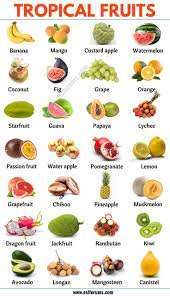
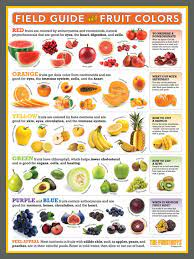
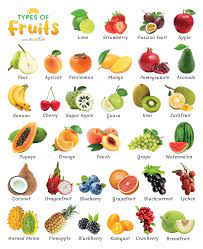
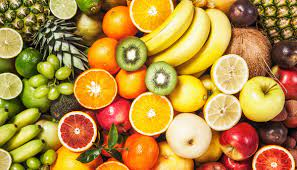
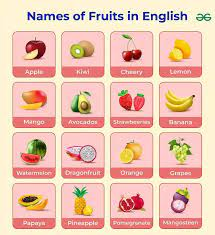
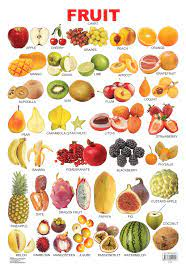
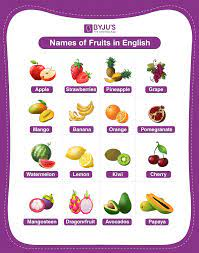
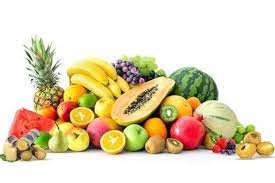
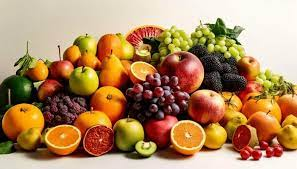
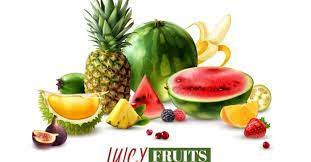

Scraped 10 images for 'cars':











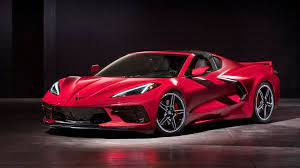
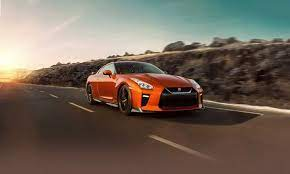
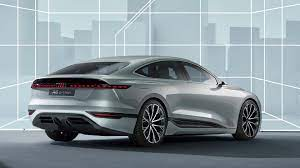
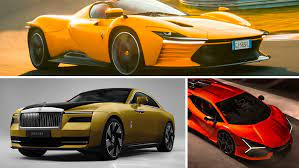
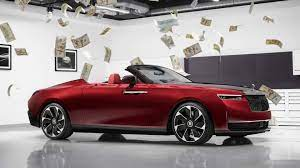
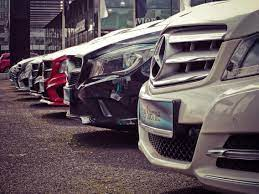
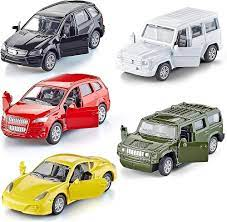
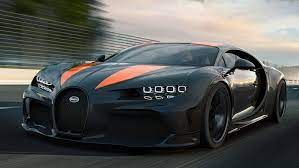
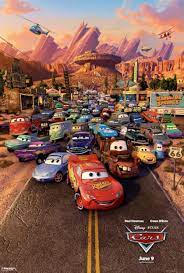
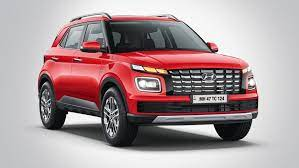

WebDriverException: Message: disconnected: not connected to DevTools
  (failed to check if window was closed: disconnected: not connected to DevTools)
  (Session info: chrome=122.0.6261.131)
Stacktrace:
	GetHandleVerifier [0x00007FF710EDAD02+56930]
	(No symbol) [0x00007FF710E4F602]
	(No symbol) [0x00007FF710D042E5]
	(No symbol) [0x00007FF710CF191F]
	(No symbol) [0x00007FF710CF1490]
	(No symbol) [0x00007FF710D06411]
	(No symbol) [0x00007FF710D878B9]
	(No symbol) [0x00007FF710D6BA43]
	(No symbol) [0x00007FF710D3D438]
	(No symbol) [0x00007FF710D3E4D1]
	GetHandleVerifier [0x00007FF711256F8D+3711213]
	GetHandleVerifier [0x00007FF7112B04CD+4077101]
	GetHandleVerifier [0x00007FF7112A865F+4044735]
	GetHandleVerifier [0x00007FF710F79736+706710]
	(No symbol) [0x00007FF710E5B8DF]
	(No symbol) [0x00007FF710E56AC4]
	(No symbol) [0x00007FF710E56C1C]
	(No symbol) [0x00007FF710E468D4]
	BaseThreadInitThunk [0x00007FFAAEC0257D+29]
	RtlUserThreadStart [0x00007FFAB0B0AA58+40]


In [5]:
#que 3
def scrape_images(keyword, num_images=10):
    
    driver = webdriver.Chrome()

    try:
        
        driver.get("https://www.google.com/imghp")

        
        search_bar = driver.find_element(By.NAME, 'q')
        search_bar.clear()
        search_bar.send_keys(keyword)
        search_bar.send_keys(Keys.RETURN)

        
        time.sleep(2)

        
        scroll_count = 0
        while scroll_count < 3:  
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(1)
            scroll_count += 1

        
        image_elements = driver.find_elements(By.CSS_SELECTOR, 'img.rg_i')

        
        image_urls = []
        for img in image_elements[:num_images]:
            try:
                img_url = img.get_attribute('src')
                if img_url:
                    image_urls.append(img_url)
            except NoSuchElementException:
                continue


        print(f"Scraped {len(image_urls)} images for '{keyword}':")
        for url in image_urls:
            print(url)

    except TimeoutException:
        print("Timeout occurred while loading the page.")
    except NoSuchElementException:
        print("Element not found.")
    finally:
    
        driver.quit()


keywords = ['fruits', 'cars', 'Machine Learning', 'Guitar', 'Cakes']

for keyword in keywords:
    scrape_images(keyword)


In [15]:
#Que4

def scrape_smartphone_details(search_query):
    
    driver = webdriver.Chrome()

    try:
        
        driver.get("https://www.flipkart.com/")
        search_bar = driver.find_element("q")
        search_bar.send_keys(search_query)
        search_bar.submit()

        
        driver.implicitly_wait(10)

        
        search_results = driver.find_elements_by_css_selector("div._1AtVbE")

    
        brand_names = []
        smartphone_names = []
        colours = []
        ram = []
        storage = []
        primary_camera = []
        secondary_camera = []
        display_size = []
        battery_capacity = []
        prices = []
        product_urls = []

        # Scrape details for each search result
        for result in search_results:
            try:
                brand_name = result.find_element_by_css_selector("div._4rR01T").text
            except:
                brand_name = "-"
            brand_names.append(brand_name)

            try:
                smartphone_name = result.find_element_by_css_selector("a.s1Q9rs").text
            except:
                smartphone_name = "-"
            smartphone_names.append(smartphone_name)

            try:
                colour = result.find_element_by_css_selector("a._1fGeJ5").text
            except:
                colour = "-"
            colours.append(colour)

            try:
                specs = result.find_elements_by_css_selector("li.tVe95H")
                ram.append(specs[0].text if len(specs) > 0 else "-")
                storage.append(specs[1].text if len(specs) > 1 else "-")
                primary_camera.append(specs[2].text if len(specs) > 2 else "-")
                secondary_camera.append(specs[3].text if len(specs) > 3 else "-")
                display_size.append(specs[4].text if len(specs) > 4 else "-")
                battery_capacity.append(specs[5].text if len(specs) > 5 else "-")
            except:
                ram.append("-")
                storage.append("-")
                primary_camera.append("-")
                secondary_camera.append("-")
                display_size.append("-")
                battery_capacity.append("-")

            try:
                price = result.find_element_by_css_selector("div._30jeq3._1_WHN1").text
            except:
                price = "-"
            prices.append(price)

            try:
                product_url = result.find_element_by_css_selector("a._1fQZEK").get_attribute("href")
            except:
                product_url = "-"
            product_urls.append(product_url)

    
        df = pd.DataFrame({
            "Brand Name": brand_names,
            "Smartphone Name": smartphone_names,
            "Colour": colours,
            "RAM": ram,
            "Storage(ROM)": storage,
            "Primary Camera": primary_camera,
            "Secondary Camera": secondary_camera,
            "Display Size": display_size,
            "Battery Capacity": battery_capacity,
            "Price": prices,
            "Product URL": product_urls
        })

        
        df.to_csv("smartphone_details.csv", index=False)
        print("Scraping and saving data successful.")

    finally:
        
        driver.quit()


search_query = "Oneplus Nord"  
scrape_smartphone_details(search_query)


InvalidArgumentException: Message: invalid argument: invalid locator
  (Session info: chrome=122.0.6261.131)
Stacktrace:
	GetHandleVerifier [0x00007FF710EDAD02+56930]
	(No symbol) [0x00007FF710E4F602]
	(No symbol) [0x00007FF710D042E5]
	(No symbol) [0x00007FF710D497BC]
	(No symbol) [0x00007FF710D49A2C]
	(No symbol) [0x00007FF710D8A967]
	(No symbol) [0x00007FF710D6BCDF]
	(No symbol) [0x00007FF710D881E2]
	(No symbol) [0x00007FF710D6BA43]
	(No symbol) [0x00007FF710D3D438]
	(No symbol) [0x00007FF710D3E4D1]
	GetHandleVerifier [0x00007FF711256F8D+3711213]
	GetHandleVerifier [0x00007FF7112B04CD+4077101]
	GetHandleVerifier [0x00007FF7112A865F+4044735]
	GetHandleVerifier [0x00007FF710F79736+706710]
	(No symbol) [0x00007FF710E5B8DF]
	(No symbol) [0x00007FF710E56AC4]
	(No symbol) [0x00007FF710E56C1C]
	(No symbol) [0x00007FF710E468D4]
	BaseThreadInitThunk [0x00007FFAAEC0257D+29]
	RtlUserThreadStart [0x00007FFAB0B0AA58+40]


In [12]:
# Que5

def scrape_coordinates(city_name):
    
    driver = webdriver.Chrome()

    try:
        
        driver.get("https://www.google.com/maps")

        
        search_bar = driver.find_element(By.ID, 'searchboxinput')
        search_bar.clear()
        search_bar.send_keys(city_name)
        search_bar.send_keys(Keys.RETURN)
        time.sleep(5)


        current_url = driver.current_url
        if '@' in current_url:
            coordinates_str = current_url.split('@')[1].split(',')[0]
            latitude, longitude = coordinates_str.split(',')
            print(f"Coordinates for {city_name}: Latitude {latitude}, Longitude {longitude}")
        else:
            print(f"Coordinates not found for {city_name}")

    except Exception as e:
        print(f"An error occurred: {e}")

    finally:
        
        driver.quit()
city_name = "New York City" 
scrape_coordinates(city_name)



An error occurred: not enough values to unpack (expected 2, got 1)


In [13]:
#que6

def scrape_gaming_laptops():
    
    driver = webdriver.Chrome()

    try:
    
        driver.get("https://www.digit.in/top-products/best-gaming-laptops-40.html")

        
        laptop_listings = driver.find_elements(By.CSS_SELECTOR, 'div.TopNumbeHeading.clearfix')

        
        laptops = []
        specifications = []

        # Scrape details for each laptop
        for laptop in laptop_listings:
            try:
                laptop_name = laptop.find_element(By.CSS_SELECTOR, 'div.TopNumbeHeading.clearfix h3').text
                laptops.append(laptop_name)
            except:
                laptops.append("-")

            try:
                specs = laptop.find_element(By.CSS_SELECTOR, 'div.specs').text
                specifications.append(specs)
            except:
                specifications.append("-")

    
        df = pd.DataFrame({
            "Laptop Name": laptops,
            "Specifications": specifications
        })

        
        df.to_csv("gaming_laptops.csv", index=False)
        print("Scraping and saving data successful.")

    except Exception as e:
        print(f"An error occurred: {e}")

    finally:
        driver.quit()

scrape_gaming_laptops()


Scraping and saving data successful.


In [14]:
#Que7

def scrape_forbes_billionaires():
    driver = webdriver.Chrome()

    try:
        
        driver.get("https://www.forbes.com/billionaires/")

        
        driver.implicitly_wait(10)

    
        billionaire_entries = driver.find_elements(By.CSS_SELECTOR, 'div.table-body div')

        
        ranks = []
        names = []
        net_worths = []
        ages = []
        citizenships = []
        sources = []
        industries = []

        
        for entry in billionaire_entries:
            try:
                rank = entry.find_element(By.CSS_SELECTOR, 'div.rank').text
                ranks.append(rank)
            except:
                ranks.append("-")

            try:
                name = entry.find_element(By.CSS_SELECTOR, 'div.personName').text
                names.append(name)
            except:
                names.append("-")

            try:
                net_worth = entry.find_element(By.CSS_SELECTOR, 'div.netWorth').text
                net_worths.append(net_worth)
            except:
                net_worths.append("-")

            try:
                age = entry.find_element(By.CSS_SELECTOR, 'div.age').text
                ages.append(age)
            except:
                ages.append("-")

            try:
                citizenship = entry.find_element(By.CSS_SELECTOR, 'div.countryOfCitizenship').text
                citizenships.append(citizenship)
            except:
                citizenships.append("-")

            try:
                source = entry.find_element(By.CSS_SELECTOR, 'div.source-column').text
                sources.append(source)
            except:
                sources.append("-")

            try:
                industry = entry.find_element(By.CSS_SELECTOR, 'div.category').text
                industries.append(industry)
            except:
                industries.append("-")


        df = pd.DataFrame({
            "Rank": ranks,
            "Name": names,
            "Net Worth": net_worths,
            "Age": ages,
            "Citizenship": citizenships,
            "Source": sources,
            "Industry": industries
        })

        
        df.to_csv("forbes_billionaires.csv", index=False)
        print("Scraping and saving data successful.")

    except Exception as e:
        print(f"An error occurred: {e}")

    finally:
    
        driver.quit()
scrape_forbes_billionaires()


Scraping and saving data successful.


In [16]:
#Que8

def scrape_youtube_comments(video_url, max_comments=500):

    driver = webdriver.Chrome()

    try:
        
        driver.get(video_url)

        
        driver.implicitly_wait(10)

    
        scroll_count = 0
        while scroll_count < 10 and len(driver.find_elements(By.CSS_SELECTOR, 'yt-formatted-string#content-text')) < max_comments:
            driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
            time.sleep(2)
            scroll_count += 1

        
        comments = driver.find_elements(By.CSS_SELECTOR, 'yt-formatted-string#content-text')
        upvotes = driver.find_elements(By.CSS_SELECTOR, 'span#vote-count-middle')
        times = driver.find_elements(By.CSS_SELECTOR, 'yt-formatted-string.published-time-text')

        
        comment_texts = [comment.text for comment in comments[:max_comments]]
        upvote_counts = [upvote.text for upvote in upvotes[:max_comments]]
        time_posted = [time.text for time in times[:max_comments]]

        
        df = pd.DataFrame({
            "Comment": comment_texts,
            "Upvotes": upvote_counts,
            "Time Posted": time_posted
        })

        
        df.to_csv("youtube_comments.csv", index=False)
        print("Scraping and saving data successful.")

    except Exception as e:
        print(f"An error occurred: {e}")

    finally:
    
        driver.quit()

video_url = "https://www.youtube.com/watch?v=YOUR_VIDEO_ID"  
scrape_youtube_comments(video_url, max_comments=500)


Scraping and saving data successful.


In [17]:
#Que 9

def scrape_hostels_in_london():
    
    driver = webdriver.Chrome()

    try:
        
        driver.get("https://www.hostelworld.com/s?q=London,%20England&country=England&city=London&type=city&id=3&from=2022-04-12&to=2022-04-13&guests=1&page=1")

        
        driver.implicitly_wait(10)

        
        hostel_listings = driver.find_elements(By.CSS_SELECTOR, 'div#fabResultsContainer div.property-card')


        hostel_names = []
        distances = []
        ratings = []
        total_reviews = []
        overall_reviews = []
        privates_prices = []
        dorms_prices = []
        facilities = []
        property_descriptions = []

        
        for hostel in hostel_listings:
            try:
                hostel_name = hostel.find_element(By.CSS_SELECTOR, 'h2.title-2').text
                hostel_names.append(hostel_name)
            except:
                hostel_names.append("-")

            try:
                distance = hostel.find_element(By.CSS_SELECTOR, 'span.description').text
                distances.append(distance)
            except:
                distances.append("-")

            try:
                rating = hostel.find_element(By.CSS_SELECTOR, 'div.rating.rating-summary-container').text
                ratings.append(rating)
            except:
                ratings.append("-")

            try:
                total_review = hostel.find_element(By.CSS_SELECTOR, 'div.rating__summary.rating__summary--count').text
                total_reviews.append(total_review)
            except:
                total_reviews.append("-")

            try:
                overall_review = hostel.find_element(By.CSS_SELECTOR, 'div.rating__summary.rating__summary--superb').text
                overall_reviews.append(overall_review)
            except:
                overall_reviews.append("-")

            try:
                private_price = hostel.find_element(By.CSS_SELECTOR, 'div.price.price-summary').text
                privates_prices.append(private_price)
            except:
                privates_prices.append("-")

            try:
                dorm_price = hostel.find_element(By.CSS_SELECTOR, 'div.price.price-summary').text
                dorms_prices.append(dorm_price)
            except:
                dorms_prices.append("-")

            try:
                facility = hostel.find_element(By.CSS_SELECTOR, 'div.facilities-list').text
                facilities.append(facility)
            except:
                facilities.append("-")

            try:
                description = hostel.find_element(By.CSS_SELECTOR, 'div.fab-description').text
                property_descriptions.append(description)
            except:
                property_descriptions.append("-")

        
        df = pd.DataFrame({
            "Hostel Name": hostel_names,
            "Distance from City Centre": distances,
            "Ratings": ratings,
            "Total Reviews": total_reviews,
            "Overall Reviews": overall_reviews,
            "Private Prices": privates_prices,
            "Dorm Prices": dorms_prices,
            "Facilities": facilities,
            "Property Description": property_descriptions
        })

    
        df.to_csv("hostels_in_london.csv", index=False)
        print("Scraping and saving data successful.")

    except Exception as e:
        print(f"An error occurred: {e}")

    finally:
        
        driver.quit()
scrape_hostels_in_london()


Scraping and saving data successful.
